# Music Note Classification

## Project Overview

---
### **Introduction**

For our Spring 2021 semester ITEC 4700 Artificial Intelligence project, the team was tasked with selecting a topic of interest that could apply Machine Learning to generate a solution. After much deliberation, we decided to base our project on a project conducted by four students at Stanford University called **Music Genre Classification.** 

*   [Report](http://cs229.stanford.edu/proj2016/report/BurlinCremeLenain-MusicGenreClassification-report.pdf)
*   [Poster](http://cs229.stanford.edu/proj2016/poster/BurlinCremeLenain-MusicGenreClassification-poster.pdf)
---
### **The Team**

Sarah Price<br>
Ruth Whitehouse<br>
Shababa Kamreen<br>
Lillian Sheppard<br>

---
### **The Problem**

Our original plan was to follow the concept of 


Our classification is based off of [this](https://www.kaggle.com/kishanj/music-notes-datasets) dataset from **Kaggle**.

## Importing the Data


Importing the Kaggle dataset into Colab - for direction on how to directly import from Kaggle, credit to:

https://medium.com/analytics-vidhya/how-to-fetch-kaggle-datasets-into-google-colab-ea682569851a

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [ ]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command

[Errno 2] No such file or directory: '/content/gdrive/My Drive/Kaggle'
/content


In [ ]:
!kaggle datasets download -d kishanj/music-notes-datasets

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /content/gdrive/My Drive/Kaggle. Or use the environment method.


In [ ]:
!ls

gdrive	sample_data


In [ ]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

unzip:  cannot find or open *.zip, *.zip.zip or *.zip.ZIP.

No zipfiles found.


## Data Preparation

---
In order to begin teaching the machine how to classify the music notes, we have to do some preparation work to the dataset. This includes splitting the data into 3 sets: the training, the validation, and the testing. 

We want to be sure that there are equal opportunities for the machine to learn each type of note, so initially, we split the data into Pandas dataframes for each type of note, creating 5 dataframes. Once split, we divided each of those frames into training, validation, and testing sets for each type of note. Finally, we combined each of the 5 training, validation, and testing sets back into one dataframe for each purpose, so that it would include notes of each type.

In [34]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

%matplotlib inline



url = 'https://raw.githubusercontent.com/staranger01/ai/main/dataset.csv'

notes = pd.read_csv(url)

print(notes.shape)
notes.head()


(5000, 785)


,label,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,pixel 10,pixel 11,pixel 12,pixel 13,pixel 14,pixel 15,pixel 16,pixel 17,pixel 18,pixel 19,pixel 20,pixel 21,pixel 22,pixel 23,pixel 24,pixel 25,pixel 26,pixel 27,pixel 28,pixel 29,pixel 30,pixel 31,pixel 32,pixel 33,pixel 34,pixel 35,pixel 36,pixel 37,pixel 38,pixel 39,...,pixel 745,pixel 746,pixel 747,pixel 748,pixel 749,pixel 750,pixel 751,pixel 752,pixel 753,pixel 754,pixel 755,pixel 756,pixel 757,pixel 758,pixel 759,pixel 760,pixel 761,pixel 762,pixel 763,pixel 764,pixel 765,pixel 766,pixel 767,pixel 768,pixel 769,pixel 770,pixel 771,pixel 772,pixel 773,pixel 774,pixel 775,pixel 776,pixel 777,pixel 778,pixel 779,pixel 780,pixel 781,pixel 782,pixel 783,pixel 784
0,Whole,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,254,254,254,254,254,254,254,254,254,253,253,253,253,253,253,253,253,253,253,253,...,254,254,254,254,254,254,254,254,254,254,254,254,253,253,253,253,253,253,253,253,253,253,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254
1,Whole,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
2,Whole,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
3,Whole,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,...,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253
4,Whole,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,...,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252


In [35]:

!pwd

/content


Split dataset into individual dataframes based on the type of note - this will allow us to pull our training set with an equal number of each note.

In [ ]:
eight = notes.groupby('label').get_group('Eight')
quarter = notes.groupby('label').get_group('Quarter')
half = notes.groupby('label').get_group('Half')
sixteenth = notes.groupby('label').get_group('Sixteenth')
whole = notes.groupby('label').get_group('Whole')

print(eight.shape)
print(quarter.shape)
print(half.shape)
print(sixteenth.shape)
print(whole.shape)

(1000, 785)
(1000, 785)
(1000, 785)
(1000, 785)
(1000, 785)


Split each type of note into a training set vs a test set, so that we have an equal number of each type of note in the training set.

In [ ]:
from sklearn.model_selection import train_test_split

eight_train, eight_test = train_test_split(eight, test_size=0.2)
quarter_train, quarter_test = train_test_split(quarter, test_size=0.2)
half_train, half_test = train_test_split(half, test_size=0.2)
sixteenth_train, sixteenth_test = train_test_split(sixteenth, test_size=0.2)
whole_train, whole_test = train_test_split(whole, test_size=0.2)

print(len(eight_train), len(eight_test))
print(len(quarter_train), len(quarter_test))
print(len(half_train), len(half_test))
print(len(sixteenth_train), len(sixteenth_test))
print(len(whole_train), len(whole_test))


800 200
800 200
800 200
800 200
800 200


Now, split the validation sets out of each training set.

In [ ]:
eight_val = eight_train[700:]
quarter_val = quarter_train[700:]
half_val = half_train[700:]
sixteenth_val = sixteenth_train[700:]
whole_val = whole_train[700:]

eight_train = eight_train[:700]
quarter_train = quarter_train[:700]
half_train = half_train[:700]
sixteenth_train = sixteenth_train[:700]
whole_train = whole_train[:700]

Combine the training and test sets for each note type into one training and test set for the whole dataset.

In [ ]:
train_frames = [eight_train,quarter_train,half_train,sixteenth_train,whole_train]
train = pd.concat(train_frames)

val_frames = [eight_val,quarter_val,half_val,sixteenth_val,whole_val]
val = pd.concat(val_frames)

test_frames = [eight_test,quarter_test,half_test,sixteenth_test,whole_test]
test = pd.concat(test_frames)

print(len(train))
print(len(val))
print(len(test))

3500
500
1000


Split training and testing sets into x and y sets to correlate the labels and notes.

In [ ]:
x_train = train.iloc[:,2:].values
y_train = train['label'].to_numpy()

print('Train:', '\n', x_train[:5])
print(y_train[:5])

x_val = val.iloc[:,2:].values
y_val = val['label'].to_numpy()

print('Validation:', '\n', x_val[:5])
print(y_val[:5])

x_test = test.iloc[:,2:].values
y_test = test['label'].to_numpy()

print('\n', 'Test:', '\n', x_test[:5])
print(y_test[:5])

Train: 
 [[254 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
['Eight' 'Eight' 'Eight' 'Eight' 'Eight']
Validation: 
 [[254 254 254 ... 254 254 254]
 [253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]
 [255 255 255 ... 255 255 255]
 [254 254 254 ... 254 254 254]]
['Eight' 'Eight' 'Eight' 'Eight' 'Eight']

 Test: 
 [[255 255 255 ... 255 255 255]
 [254 254 254 ... 254 254 254]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
['Eight' 'Eight' 'Eight' 'Eight' 'Eight']


## Training the Model - Random Forrest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_train_pred = random_forest.predict(x_train)

In [ ]:
np.mean(y_train == y_train_pred)

1.0

In [ ]:
y_pred = random_forest.predict(x_test)

In [ ]:
np.mean(y_pred == y_test)

0.977

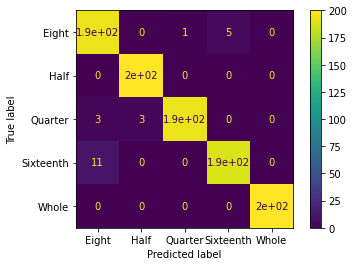

In [ ]:
plot_confusion_matrix(random_forest, x_test, y_test)

## Train the Model - K-Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 4, weights = 'distance')
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')

In [ ]:
y_train_pred = knn.predict(x_train)
np.mean(y_train_pred == y_train)

1.0

In [ ]:
y_test_pred = knn.predict(x_test)
np.mean(y_test_pred == y_test)

0.966